In [1]:
from tensorflow import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

In [2]:
#define some parametes related to specific training problem
batch_size = 10 #reduce this if you want to run this locally, at your pc
num_classes = 10 #this is problem specific
epochs = 10 # to save some time. Typically you need more that 100.

# input image dimensions
img_rows, img_cols = 32, 32

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#split x train to train and validation set 
(x_train,y_train),(x_valid,y_valid)=(x_train[:40000],y_train[:40000]),(x_train[40000:],y_train[40000:])

#scaling the data 
X_train= x_train/255
X_test=x_test/255
X_valid=x_valid/255

In [4]:
# reshaping the data to appropriate tensor format
X_train = X_train.reshape(40000, 32, 32,3 )
X_test = X_test.reshape(10000, 32, 32, 3)
X_valid= X_valid.reshape(10000,32,32,3)
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0],'valid samples')
print(X_test.shape[0], 'test samples')

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 valid samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
#model_path = '/content/cifar10_CNN (1).h5'

In [7]:
loaded_model = keras.models.load_model('cifar10_KL_CNN.h5')

In [8]:
# calculate some common performance scores
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9556869864463806
Test accuracy: 0.6801000237464905


In [9]:
y_train_predictions_vectorized = loaded_model.predict(X_train)
y_train_predictions = np.argmax(y_train_predictions_vectorized, axis=1)
y_test_predictions_vectorized = loaded_model.predict(X_test)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
Y_test= np.argmax(y_test,axis=1)
Y_train= np.argmax(y_train,axis=1)

313/313 [==============================] - 3s 9ms/step


In [10]:
#calculate  metric scores 
acc_train= accuracy_score(Y_train, y_train_predictions)
acc_test = accuracy_score(Y_test, y_test_predictions)
pre_train=precision_score(Y_train, y_train_predictions, average='macro')
pre_test = precision_score(Y_test, y_test_predictions, average='macro')
rec_train=recall_score(Y_train, y_train_predictions, average='macro')
rec_test = recall_score(Y_test, y_test_predictions, average='macro')
f1_train=f1_score(Y_train, y_train_predictions, average='macro')
f1_test = f1_score(Y_test, y_test_predictions, average='macro')
#print the scores
print('')
print(' Printing performance scores:')
print('')

print('Accuracy scores of CNN classifier are:',
      'train: {:.2f}'.format(acc_train), 'and test: {:.2f}.'.format(acc_test))
print('Precision scores of CNN classifier are:',
      'train: {:.2f}'.format(pre_train), 'and test: {:.2f}.'.format(pre_test))
print('Recall scores of CNN classifier are:',
      'train: {:.2f}'.format(rec_train), 'and test: {:.2f}.'.format(rec_test))
print('F1 scores of CNN classifier are:',
      'train: {:.2f}'.format(f1_train), 'and test: {:.2f}.'.format(f1_test))
print('')


 Printing performance scores:

Accuracy scores of CNN classifier are: train: 0.86 and test: 0.68.
Precision scores of CNN classifier are: train: 0.86 and test: 0.68.
Recall scores of CNN classifier are: train: 0.86 and test: 0.68.
F1 scores of CNN classifier are: train: 0.86 and test: 0.68.



In [11]:
#confusion matrix
cfm = confusion_matrix(Y_test,y_test_predictions )
#print the confusion matrix
print('')
print(' Printing confusion matrix:')
print('')
print(cfm)


 Printing confusion matrix:

[[823  14  35   9  11   2   7   8  66  25]
 [ 44 837   2   5   3   4   8   4  28  65]
 [115  13 560  37  99  56  51  32  26  11]
 [ 64  23  97 438  78 150  58  43  34  15]
 [ 49   2 105  57 629  19  54  67  16   2]
 [ 23   8  90 172  59 547  16  55  20  10]
 [ 17  17  84  54  43  18 750   5   8   4]
 [ 33   4  38  27  77  58   4 739   3  17]
 [120  50   9   3   5   5   1   1 781  25]
 [ 70 143  10   7   5   7  10  16  35 697]]


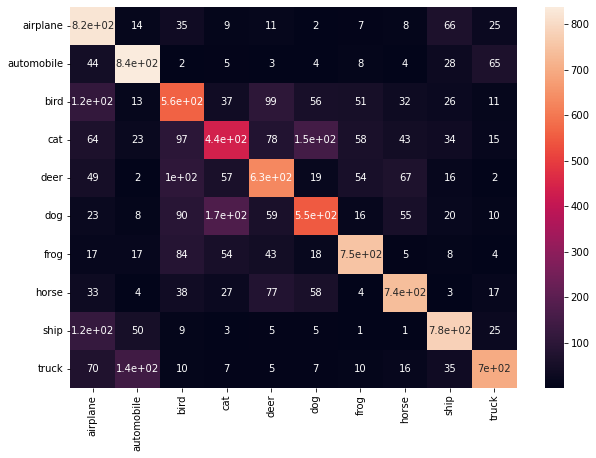

In [12]:
import pandas as pd
import seaborn as sn
classes=['airplane','automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm_simple_CNN_KL.png")
plt.show()

NameError: name 'cm' is not defined

<Figure size 432x288 with 0 Axes>

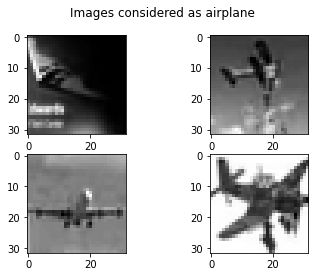

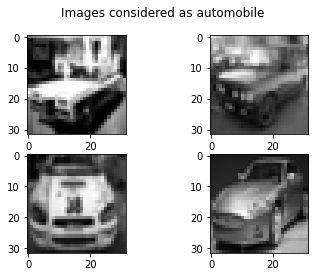

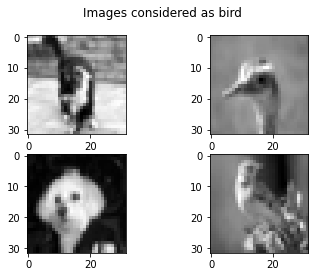

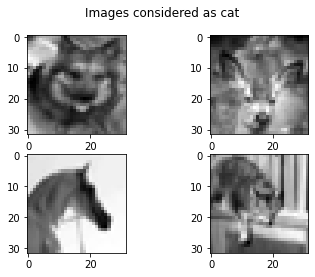

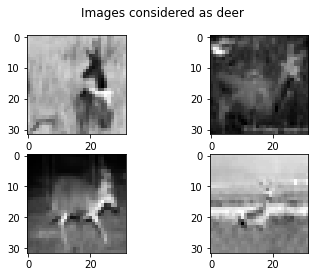

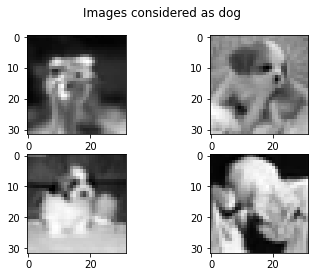

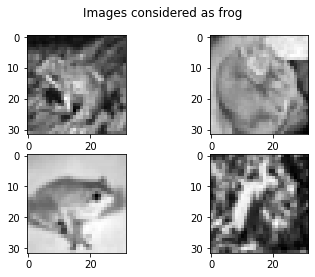

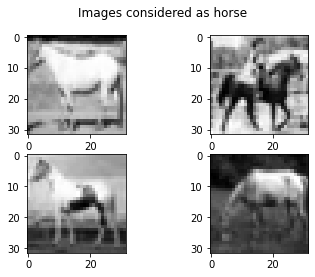

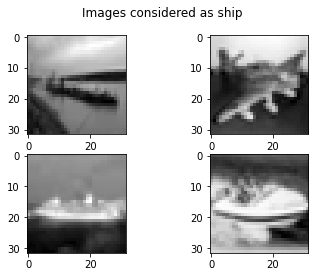

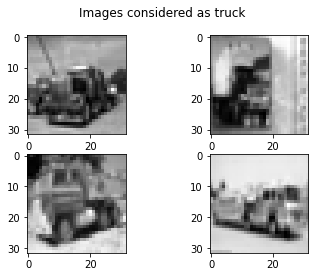

In [14]:
# illustrate few results
# class_to_demonstrate = random.randint(0, 9)

classes=['airplane','automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']
# find 9 images the corespond to the above class,
# using the CNN predictions as outputs

class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    plots=plt.figure()

    # plot 4 images as gray scale
    plt.subplot(221)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(y_test_predictions==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(222)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(y_test_predictions==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(223)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(y_test_predictions==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(224)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(y_test_predictions==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    tmp_title = 'Images considered as ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)
    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1
plots.figure.savefig("example_plot_KL_CNN.png")   